In [7]:
# setup
from mlwp import *
diabetes = datasets.load_diabetes()
%matplotlib inline

In [8]:
N = 20
ftr = np.linspace(-10, 10, num=N)
# ftr values
tgt = 2*ftr**2 - 3 + np.random.uniform(-2, 2, N) # tgt = func(ftr)

(train_ftr, test_ftr,
train_tgt, test_tgt) = skms.train_test_split(ftr, tgt, test_size=N//2)

display(pd.DataFrame({"ftr":train_ftr,
"tgt":train_tgt}).T)

,0,1,2,3,4,5,6,7,8,9
ftr,-1.5789,-6.8421,-3.6842,1.5789,-7.8947,3.6842,7.8947,4.7368,5.7895,-0.5263
tgt,2.3906,91.0234,22.3791,3.8658,122.5817,22.9962,121.7528,40.6026,62.7696,-1.6137


seems y is 2.39 stuff.. 
Using calculator to calculate synthetic values
tgt = 
y = 2x^2 - 3 + noise

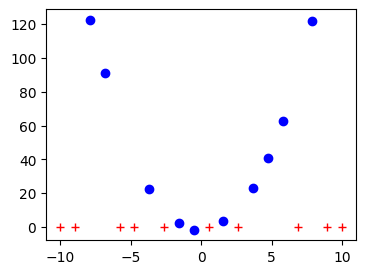

In [9]:
plt.plot(train_ftr, train_tgt, 'bo')
plt.plot(test_ftr,
np.zeros_like(test_ftr), 'r+');

In [10]:
# note: sklearn *really* wants 2D inputs (a table)
# so we use rehape here.
sk_model = linear_model.LinearRegression()
sk_model.fit(train_ftr.reshape(-1, 1), train_tgt)
sk_preds = sk_model.predict(test_ftr.reshape(-1, 1))
sk_preds[:3]

array([53.218 , 41.4552, 56.8374])

In [11]:
# fit-predict-evaluate a 1D polynomial (a line)
model_one = np.poly1d(np.polyfit(train_ftr, train_tgt, 1))
preds_one = model_one(test_ftr)
print(preds_one[:3])

[53.218  41.4552 56.8374]


In [12]:
# the predictions come back the same
print("all close?", np.allclose(sk_preds, preds_one))
# and we can still use sklearn to evaluate it
mse = metrics.mean_squared_error
print("RMSE:", np.sqrt(mse(test_tgt, preds_one)))

all close? True
RMSE: 86.69151817350722


In [13]:
# fit-predict-evaluate a 2D polynomial (a parabola)
model_two = np.poly1d(np.polyfit(train_ftr, train_tgt, 2))
preds_two = model_two(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_two)))

RMSE: 1.276599218888114


In [14]:
model_three = np.poly1d(np.polyfit(train_ftr, train_tgt, 9))
preds_three = model_three(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_three)))

RMSE: 317.36344242351373


In [15]:
def training_loss(loss, model, training_data):

    ' total training_loss on train_data with model under loss'
    return sum(loss(model.predict(x.reshape(1, -1)), y) 
        for x, y in training_data)
def squared_error(prediction, actual):
    ' squared error on a single example '
    return (prediction - actual)**2

In [16]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes.data, diabetes.target)
training_data = zip(diabetes.data, diabetes.target)
my_training_loss = training_loss(squared_error,knn,training_data)
print(my_training_loss)

[863792.3333]


In [17]:
mse = metrics.mean_squared_error(diabetes.target,
knn.predict(diabetes.data))
print(mse*len(diabetes.data))

863792.3333333333


In [18]:
model = neighbors.KNeighborsRegressor(10)
skms.cross_val_score(model,
                        diabetes.data,
                        diabetes.target,
                        cv=10,
                        scoring='neg_mean_squared_error')
# notes:
# defaults for cross_val_score are
# cv=3 fold, no shuffle, stratified if classifier
# model.score by default (regressors: r2, classifiers: accuracy)

array([-3490.4862, -2935.9002, -4138.1652, -3473.8141, -3588.6991,
       -3767.6586, -3918.5184, -2188.8107, -3803.7668, -2903.5782])

In [19]:
iris = datasets.load_iris()
model = neighbors.KNeighborsClassifier(10)
skms.cross_val_score(model, iris.data, iris.target, cv=5)

array([0.9667, 1.    , 1.    , 0.9333, 1.    ])

In [20]:
# not stratified
pet = np.array(['cat', 'dog', 'cat',
'dog', 'dog', 'dog'])
list_folds = list(skms.KFold(2).split(pet))
training_idxs = np.array(list_folds)[:, 0, :]
print(pet[training_idxs])

[['dog' 'dog' 'dog']
 ['cat' 'dog' 'cat']]


In [21]:
# stratified
# note: typically this is behind the scenes
# making StratifiedKFold produce readable output
# requires some trickery.feel free to ignore.
pet = np.array(['cat', 'dog', 'cat', 'dog', 'dog', 'dog'])

In [22]:
idxs = np.array(list(skms.StratifiedKFold(2)
.split(np.ones_like(pet), pet)))
training_idxs = idxs[:, 0, :]
print(pet[training_idxs])

[['cat' 'dog' 'dog']
 ['cat' 'dog' 'dog']]


In [23]:
# running nonstratified CV
iris = datasets.load_iris()
model = neighbors.KNeighborsClassifier(10)
non_strat_kf = skms.KFold(5)
skms.cross_val_score(model,iris.data,iris.target,cv=non_strat_kf)

array([1.    , 1.    , 0.8667, 0.9667, 0.7667])

In [24]:
# as a reminder, these are some of the imports
# that are hidden behind: from mlwpy import *
# from sklearn import (datasets, neighbors,
#model_selection as skms,
#linear_model, metrics)
# see Appendix A for details

linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()

scores = []
for r in range(10):
    tts = skms.train_test_split(diabetes.data,diabetes.target,test_size=.25)

    (diabetes_train_ftrs, diabetes_test_ftrs,diabetes_train_tgt,diabetes_test_tgt) = tts

    fit = linreg.fit(diabetes_train_ftrs, diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftrs)

    score = metrics.mean_squared_error(diabetes_test_tgt, preds)
    scores.append(score)
scores = pd.Series(np.sqrt(sorted(scores)))
df = pd.DataFrame({'RMSE':scores})
df.index.name = 'Repeat'
display(df.T)

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,49.0031,50.1913,51.9735,52.0722,53.2003,55.7007,56.2542,57.4919,58.6383,58.6942


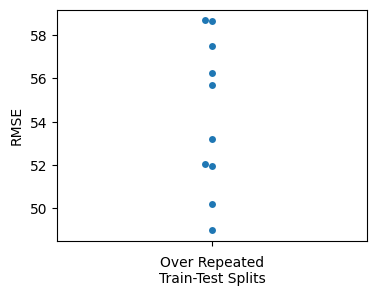

In [25]:
ax = plt.figure(figsize=(4, 3)).gca()
sns.swarmplot(y='RMSE', data=df, ax=ax)
ax.set_xlabel('Over Repeated\nTrain-Test Splits');

In [26]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0000,54.3220,3.5059,49.0031,51.9982,54.4505,57.1825,58.6942


In [27]:
def tts_fit_score(model, data, msr, test_size=.25):
    ' apply a train-test split to fit model on data and eval with MSR '
    tts = skms.train_test_split(data.data,
                                  data.target,
                                     test_size=test_size)
    (train_ftrs, test_ftrs, train_tgt, test_tgt) = tts
    fit  = linreg.fit(train_ftrs, train_tgt)
    preds = fit.predict(test_ftrs)
    score = msr(test_tgt, preds)
    return score
linreg= linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
scores = [tts_fit_score(linreg, diabetes,
metrics.mean_squared_error) for i in range(10)]
print(np.mean(scores))

3052.548205801788


,count,mean,std,min,25%,50%,75%,max
RMSE,10.0000,55.4388,3.5870,50.1900,52.9661,55.3965,58.3912,60.5431


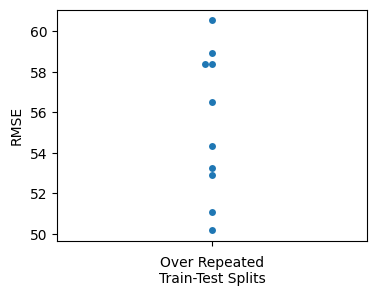

In [28]:
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()

# nondefault cv= argument
ss = skms.ShuffleSplit(test_size=.25) # default, 10 splits
scores = skms.cross_val_score(linreg,diabetes.data, diabetes.target,cv=ss,scoring='neg_mean_squared_error')

scores = pd.Series(np.sqrt(-scores))
df = pd.DataFrame({'RMSE':scores})
df.index.name = 'Repeat'

display(df.describe().T)
ax = sns.swarmplot(y='RMSE', data=df)
ax.set_xlabel('Over Repeated\nTrain-Test Splits');